<a href="https://colab.research.google.com/github/nadine-krista/INSE6220/blob/master/Raisin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Dataset Information
######Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

## Variable Information

```
1.) Area [Role='Feature' | Type='Integer']: Gives the number of pixels within the boundaries of the raisin.
2.) Perimeter [Role='Feature' | Type='Continuous']: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3.) MajorAxisLength [Role='Feature' | Type='Continuous']: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4.) MinorAxisLength [Role='Feature' | Type='Continuous']: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5.) Eccentricity [Role='Feature' | Type='Continuous']: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6.) ConvexArea [Role='Feature' | Type='Integer']: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7.) Extent [Role='Feature' | Type='Continuous']: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8.) Class  [Role='Target' | Type='Categorical']: Kecimen and Besni raisin.
```
######Raisin details as cited in [***Çinar,İ̇lkay, Koklu,Murat, and Tasdemir,Sakir. (2023). Raisin. UCI Machine Learning Repository. https://doi.org/10.24432/C5660T***].


##Load Raisin Dataset from Excel


In [132]:
# URL of the raw raisin Excel file on GitHub
raisin_ds_excel_url = "https://github.com/nadine-krista/INSE6220/raw/master/Raisin_Dataset.xlsx"

# Read the Excel file from the GitHub URL
df = pd.read_excel(raisin_ds_excel_url)

# Display the DataFrame
df.head(10)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,Kecimen
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,Kecimen
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,Kecimen
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,Kecimen
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,Kecimen


In [133]:
df.shape[0]

900

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [135]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [136]:
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [137]:
df["Class"].value_counts(normalize = True)

Class
Kecimen    0.5
Besni      0.5
Name: proportion, dtype: float64

## Exploratory Data Analysis


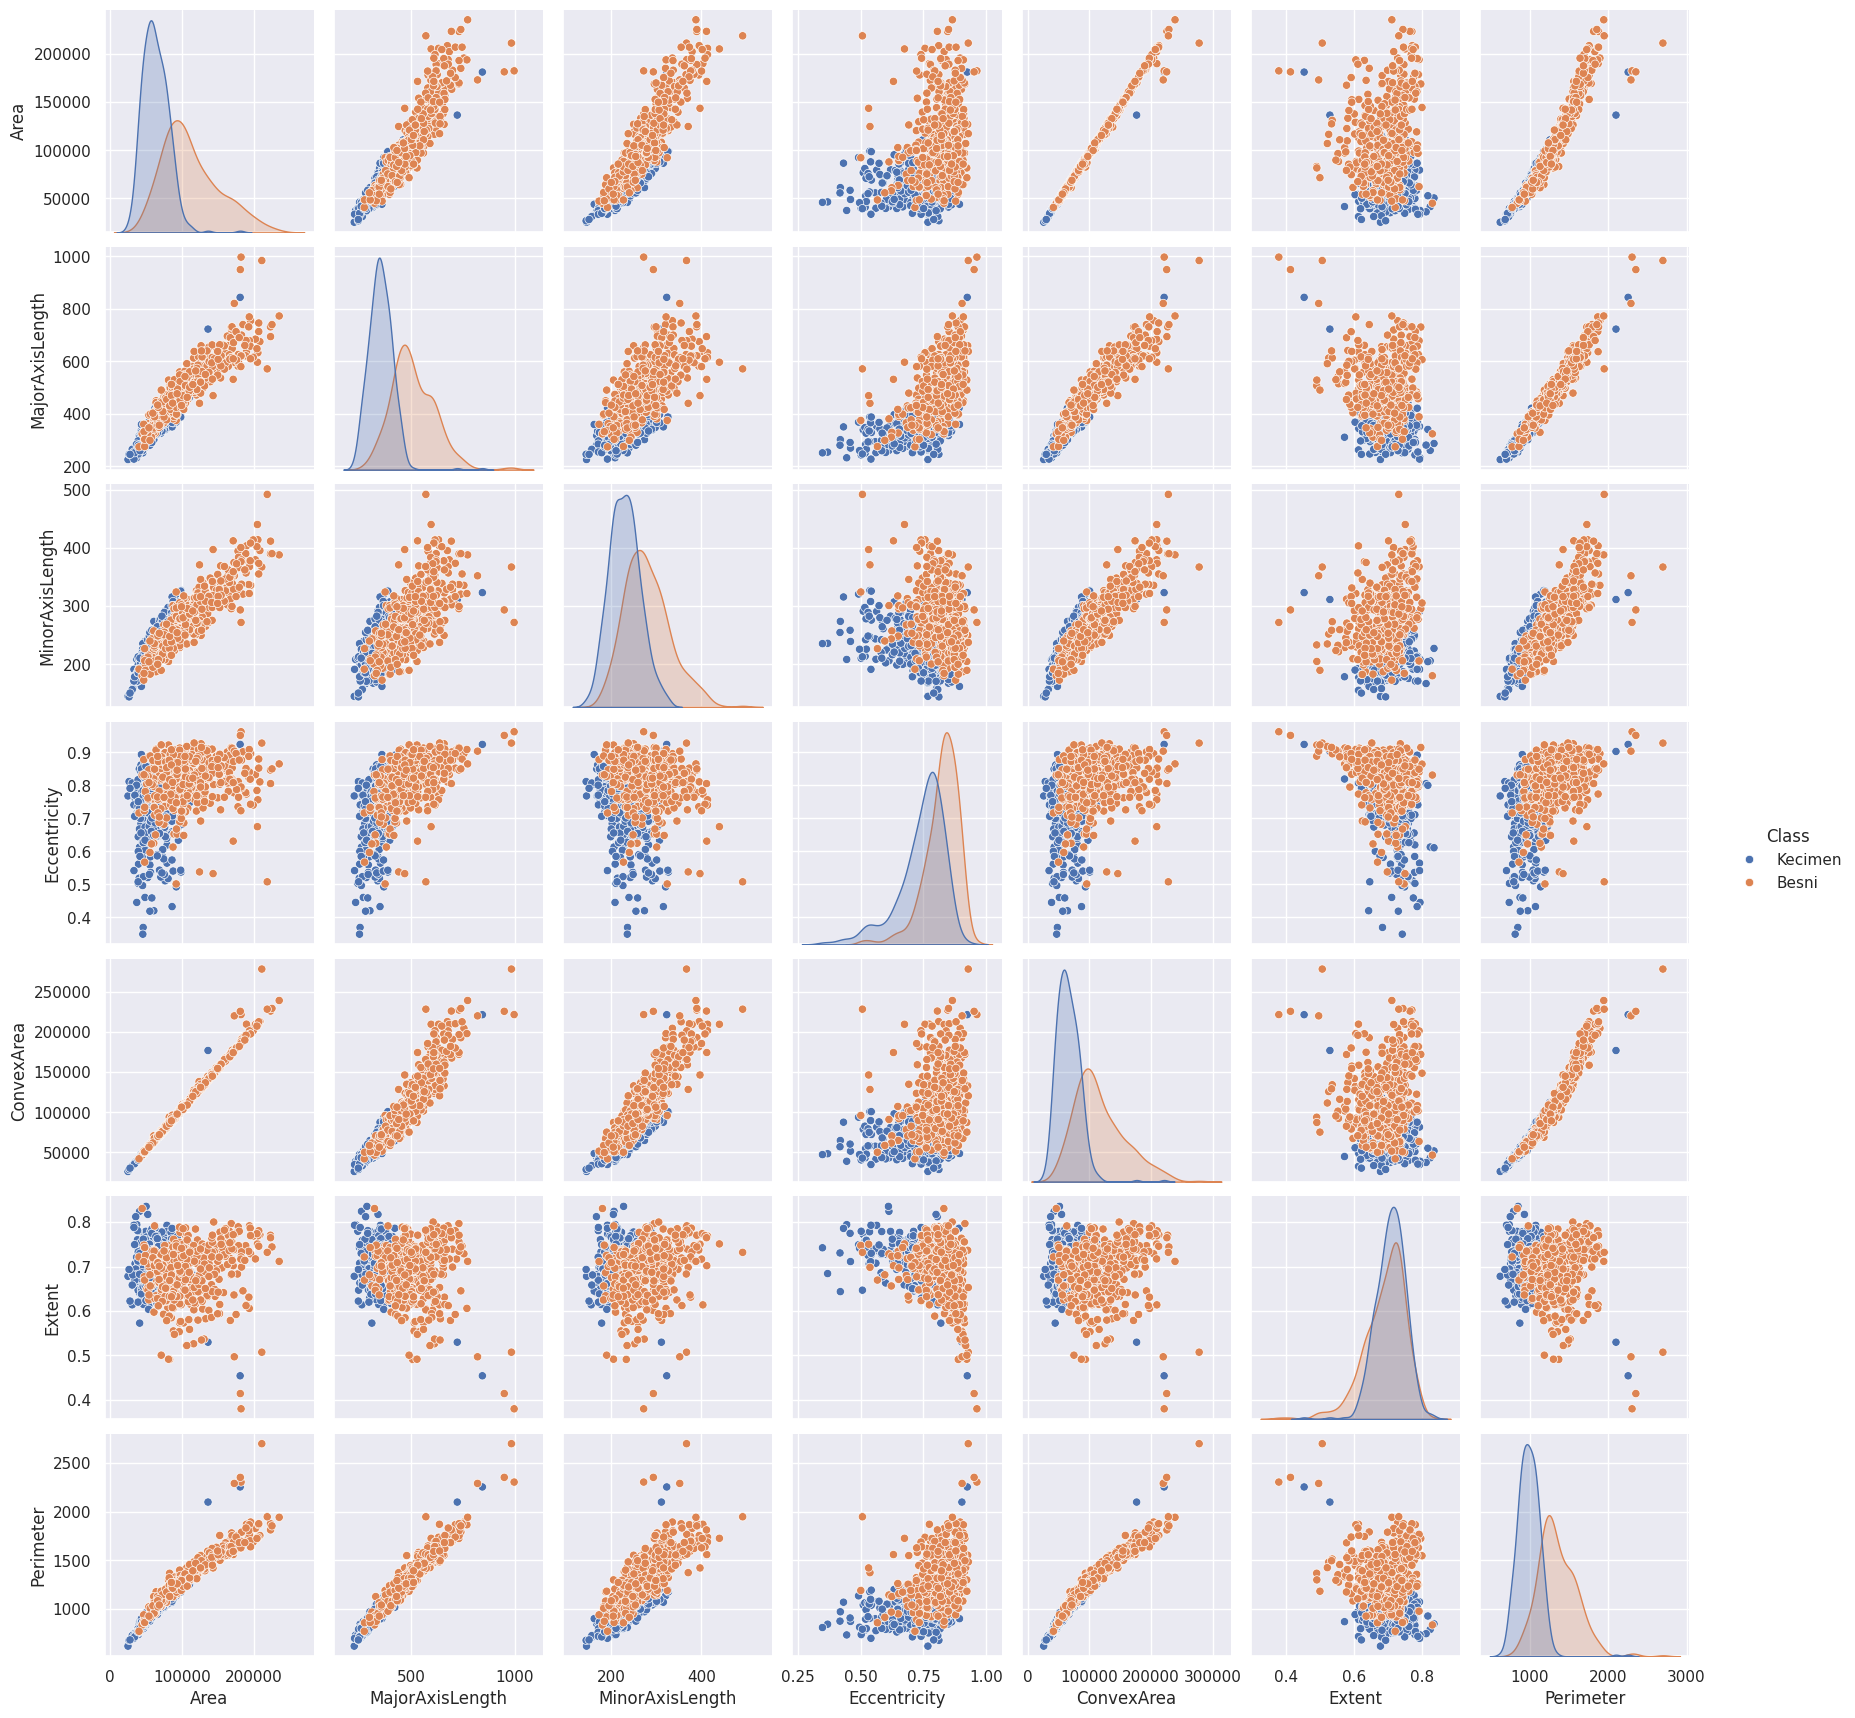

In [138]:
# Plot pairwise relationships in a dataset
sns.pairplot(df, hue='Class')
plt.show()
plt.close()

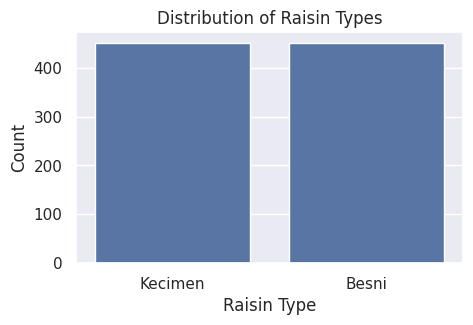

In [139]:
# Visualize the distribution of target variable 'Class'
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Raisin Types')
plt.xlabel('Raisin Type')
plt.ylabel('Count')
plt.show()
plt.close()

In [140]:
column_names_list = list(df.columns)
column_names_list

['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'Extent',
 'Perimeter',
 'Class']

In [141]:
feature_columns = [col for col in df.columns if col != 'Class']
feature_columns

['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'Extent',
 'Perimeter']

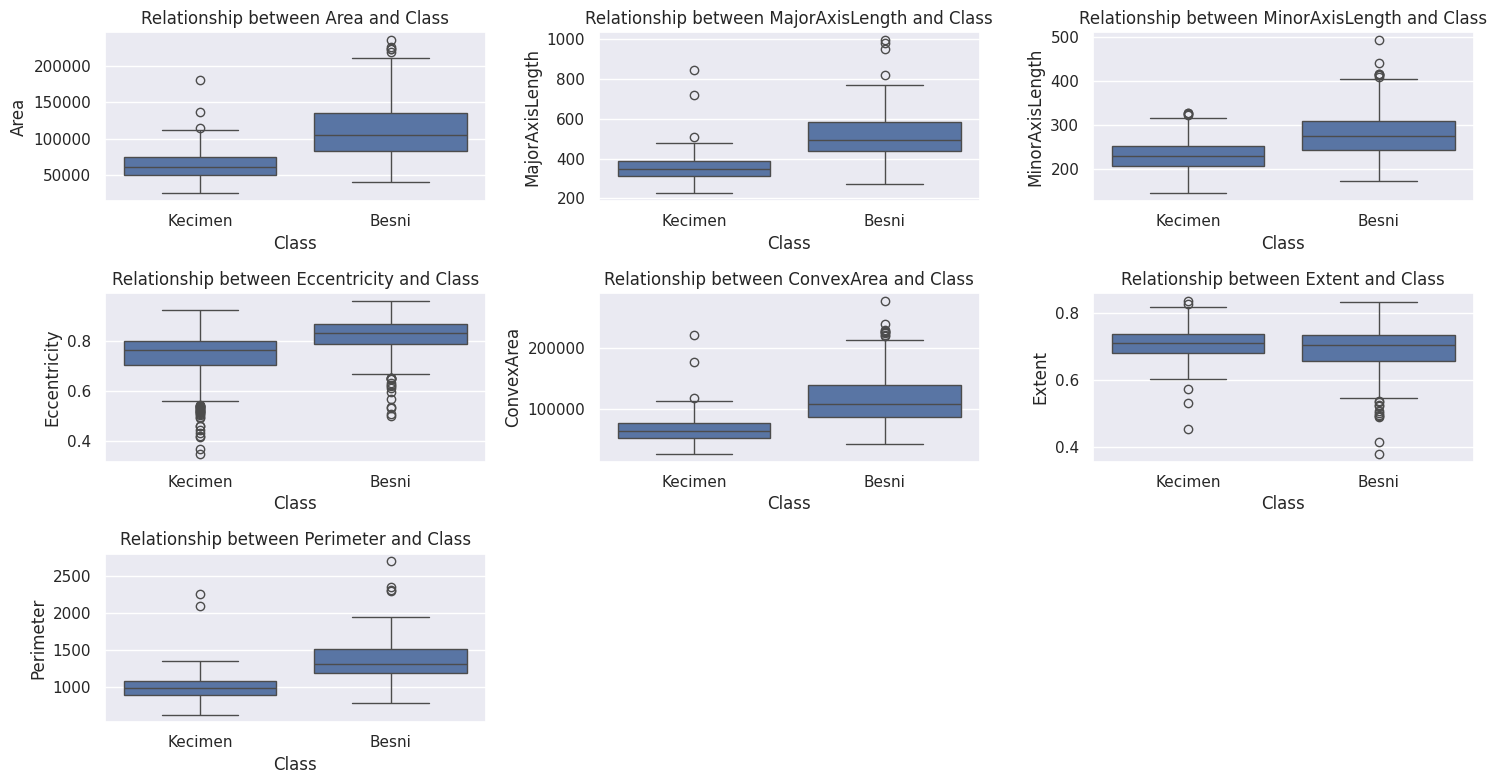

In [142]:
# Visualize the relationship between features and target variable
plt.figure(figsize=(15, 8))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Relationship between {feature} and Class')
plt.tight_layout()
plt.show()
plt.close()

In [143]:
df['Class'] = df['Class'].replace(['Kecimen', 'Besni'], [0,1])
df.head(10)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,0
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,0
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,0
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,0
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,0


In [144]:
df.tail(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
890,85646,469.774755,238.539384,0.861490,92673,0.681044,1226.892,1
891,107486,462.813134,296.091238,0.768571,108914,0.759967,1235.078,1
892,149703,637.873030,304.622532,0.878599,154549,0.593805,1596.356,1
893,187391,660.655588,362.315007,0.836205,189799,0.713947,1682.478,1
894,115272,511.472036,291.591349,0.821574,119773,0.624760,1392.653,1
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,1


######Drop Class column from Dataset

In [145]:
X = df.drop(columns=['Class'])
X.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544


In [146]:

X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [147]:
# Standardization
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X=pd.DataFrame(Xs)
X.columns=Xcols

In [157]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,900.0,1.894781e-16,1.000556,-1.601242,-0.730010,-0.228374,0.441866,3.777353
MajorAxisLength,900.0,0.000000e+00,1.000556,-1.770279,-0.737144,-0.199413,0.545458,4.883667
MinorAxisLength,900.0,-8.210716e-16,1.000556,-2.217269,-0.708091,-0.132898,0.508404,4.759444
Eccentricity,900.0,6.947529e-16,1.000556,-4.794739,-0.440641,0.191694,0.676084,2.000508
ConvexArea,900.0,6.315935e-17,1.000556,-1.596379,-0.728228,-0.234009,0.421867,4.590095
Extent,900.0,1.436875e-15,1.000556,-5.981678,-0.535921,0.147067,0.664006,2.543983
Perimeter,900.0,-6.315935e-17,1.000556,-1.998568,-0.729119,-0.169574,0.520748,5.598604


## Correlation Matrix that shows the relationship between several variables

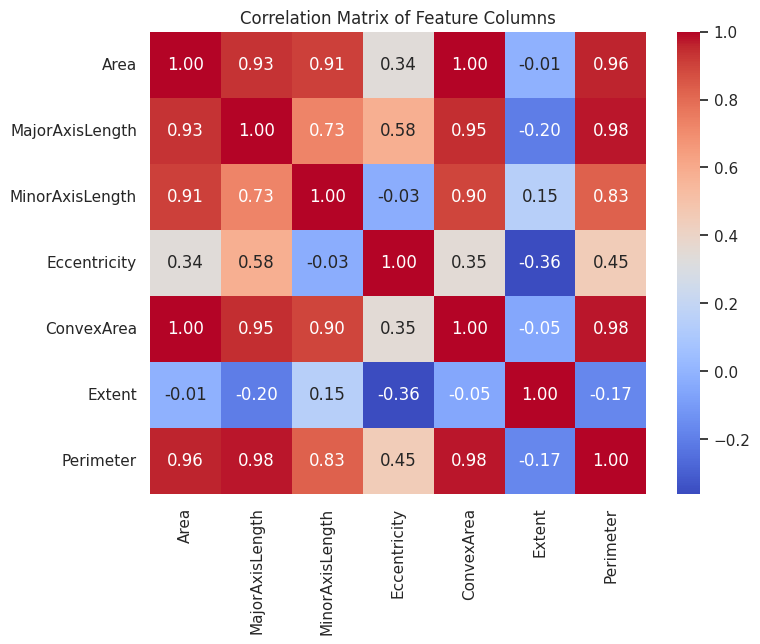

In [156]:
# Visualize correlations between Feature Columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[feature_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Feature Columns')
plt.show()
plt.close()

#PRINCIPAL COMPONENT ANALYSIS

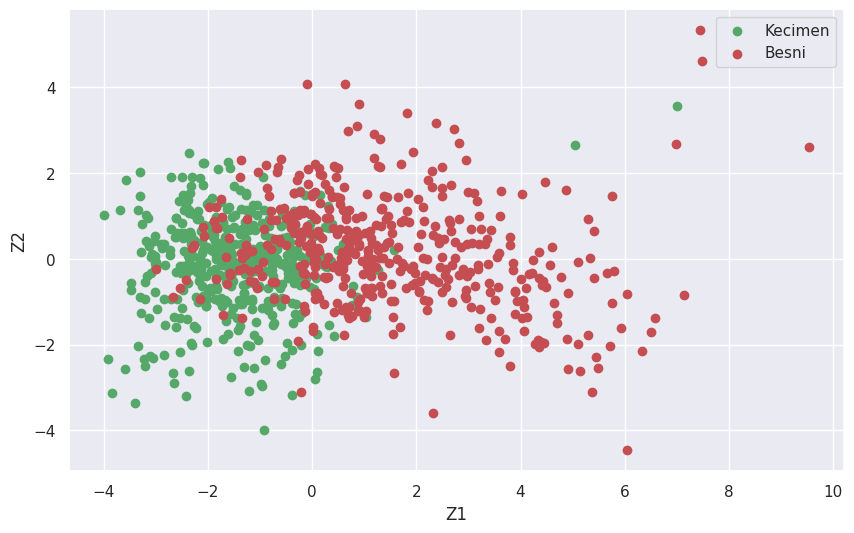

In [149]:
pca = PCA()
Z=pca.fit_transform(X)
y=df['Class']

idx_Kecimen = np.where(y==0)
idx_Besni = np.where(y==1)

plt.figure(figsize=(10,6))
plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='g', label='Kecimen')

plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='r', label='Besni')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()
plt.close()

In [150]:
A = pca.components_.T
A.round(4)

array([[ 0.4483, -0.1161,  0.0055, -0.1111, -0.611 , -0.0998, -0.6244],
       [ 0.4432,  0.1366, -0.1005,  0.4952,  0.0876, -0.6856,  0.2277],
       [ 0.3894, -0.3749,  0.236 , -0.6559,  0.3846, -0.239 ,  0.13  ],
       [ 0.203 ,  0.6108, -0.6285, -0.4263,  0.0751,  0.0536,  0.0204],
       [ 0.4509, -0.0876,  0.0367,  0.0558, -0.3924,  0.4712,  0.6391],
       [-0.0564, -0.6673, -0.732 ,  0.1091,  0.0569,  0.0235, -0.0016],
       [ 0.4508,  0.0342,  0.0443,  0.3399,  0.5552,  0.4873, -0.364 ]])

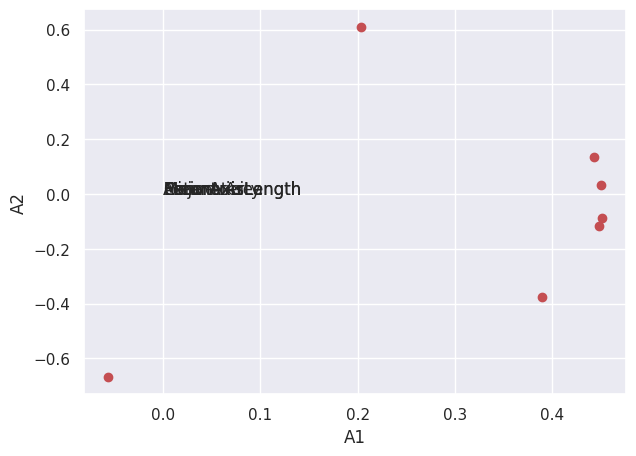

In [151]:
plt.scatter(A[:,0],A[:,1],c='r')

plt.xlabel('A1')
plt.ylabel('A2')

variables=Xcols

for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0))
    textcoords='offset points',
    ha='right',
    va='bottom',
    bbox=dict(boxstyle='round', pad=0.5, fc='yellow', alpha=0.5)
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')

plt.show()